# Shifted sphere function minimization

The goal is to optimize (minimize more precisely) the shifted-sphere cost function which is unimodal meaning it has a unique global optimum

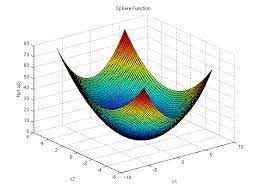

In [1]:
# Import necessaries librairies
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
# if not installed
#!pip install autograd
from autograd import grad, jacobian

In [22]:
#Define a bias for the function
f_bias = -450
d50 = 50
shift  = np.random.uniform(-100,100,d50)

In [23]:
def shifted_sphere(x):
    """Shifted-Sphere objective function.

    Has a global minimum at -450 (because of the bias we added).

    Parameters
    ----------
    x : numpy.ndarray
        The input of the function

    Returns a numpy.ndarray
    """
    global shift

    j = sum((x-shift) ** 2.0)

    return j + f_bias

In [24]:
# Define a random initial solution for dimension 50
x_0_50 = np.random.uniform(-100,100,d50)

In [25]:
# Define a general function to optimize our function (shifted sphere function)
def minimize_function(dimension, function,lw_bound,up_bound,initial_sol,optimizer = 'BFGS'):
    min_bound = lw_bound * np.ones(dimension)
    max_bound = up_bound * np.ones(dimension)
    bounds = (min_bound, max_bound)
    res = minimize(function, initial_sol, bounds=bounds,method='BFGS',tol=1e-5,callback=callbackf,options={'disp': True})
    return res

In [11]:
# Compute derivative of the function
jacobian_cost = jacobian(shifted_sphere)

In [26]:
# Define a callback this will helps to plot our results
history = []
def callbackf(x):
    fobj = shifted_sphere(x)
    history.append(fobj)

In [7]:
#Set maximum number of iterations
MAX_ITER = 1000

In [8]:
def minimize_function_jac(dimension, function,lw_bound,up_bound,initial_sol,optimizer = 'BFGS'):
    min_bound = lw_bound * np.ones(dimension)
    max_bound = up_bound * np.ones(dimension)
    bounds = (min_bound, max_bound)
    res = minimize(function, initial_sol, bounds=bounds,jac = jacobian_cost,method='BFGS',callback=callbackf,options={'disp': True, 'maxiter': MAX_ITER})
    return res

Let's compare the 2 options without gradient and using gradient

**1st option : Attempt with BFGS algorithm**

In [27]:
# Optimize the shifted function at dimension 50
minimize_function(50, shifted_sphere,-100,100,x_0_50,optimizer = 'BFGS')

Optimization terminated successfully.
         Current function value: -450.000000
         Iterations: 5
         Function evaluations: 520
         Gradient evaluations: 10


      fun: -449.9999999998534
 hess_inv: array([[ 9.91434284e-01,  6.09487063e-03, -4.68445808e-03, ...,
         5.04811970e-03, -4.01854212e-03, -8.86267804e-03],
       [ 6.09487063e-03,  9.92163503e-01,  4.70199813e-03, ...,
        -1.35064697e-02,  1.30199372e-02,  4.51637496e-03],
       [-4.68445808e-03,  4.70199813e-03,  9.96902778e-01, ...,
         6.63847659e-03, -6.17165295e-03, -4.14684202e-03],
       ...,
       [ 5.04811970e-03, -1.35064697e-02,  6.63847659e-03, ...,
         9.68937784e-01,  3.11525037e-02,  1.52758104e-04],
       [-4.01854212e-03,  1.30199372e-02, -6.17165295e-03, ...,
         3.11525037e-02,  9.68616157e-01,  1.03834871e-03],
       [-8.86267804e-03,  4.51637496e-03, -4.14684202e-03, ...,
         1.52758104e-04,  1.03834871e-03,  9.89914746e-01]])
      jac: array([ 0.00000000e+00,  0.00000000e+00, -3.81469727e-06, -3.81469727e-06,
       -3.81469727e-06,  3.81469727e-06,  0.00000000e+00, -3.81469727e-06,
        0.00000000e+00, -3.81469727e-06, 

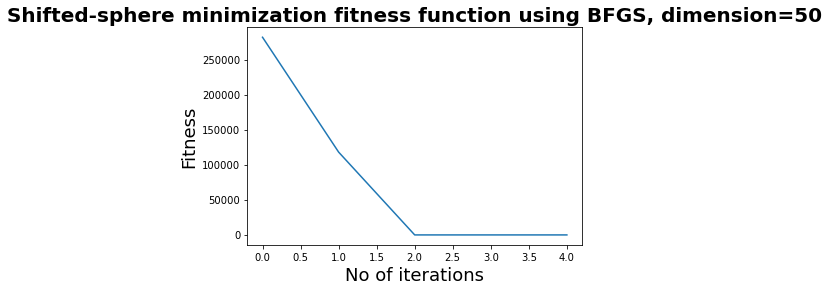

In [30]:
# Plot value of the fitness function 
plt.title("Shifted-sphere minimization fitness function using BFGS, dimension=50",fontsize=20,fontweight='bold')
plt.xlabel("No of iterations",fontsize=18)
plt.ylabel("Fitness",fontsize=18)

plt.plot(history[:MAX_ITER])

**2nd option using the same method but adding the gradient of the cost function**

In [31]:
minimize_function_jac(50, shifted_sphere,-100,100,x_0_50,optimizer = 'BFGS')

Optimization terminated successfully.
         Current function value: -450.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7


      fun: -450.0
 hess_inv: array([[ 0.99554094,  0.00590851, -0.00350852, ...,  0.01037794,
        -0.01003433, -0.00321444],
       [ 0.00590851,  0.99217087,  0.00464899, ..., -0.01375138,
         0.01329608,  0.00425932],
       [-0.00350852,  0.00464899,  0.99723939, ...,  0.00816567,
        -0.00789531, -0.00252922],
       ...,
       [ 0.01037794, -0.01375138,  0.00816567, ...,  0.97584655,
         0.02335374,  0.00748123],
       [-0.01003433,  0.01329608, -0.00789531, ...,  0.02335374,
         0.97741948, -0.00723353],
       [-0.00321444,  0.00425932, -0.00252922, ...,  0.00748123,
        -0.00723353,  0.99768278]])
      jac: array([ 1.70530257e-13,  9.94759830e-14, -7.10542736e-14, -2.55795385e-13,
       -2.84217094e-14,  1.42108547e-14, -5.68434189e-14,  3.69482223e-13,
        8.52651283e-14, -2.84217094e-14, -7.10542736e-14, -2.84217094e-14,
       -2.84217094e-14, -1.42108547e-14, -2.70006240e-13,  2.84217094e-14,
       -5.68434189e-14, -1.42108547e-14,  3.694

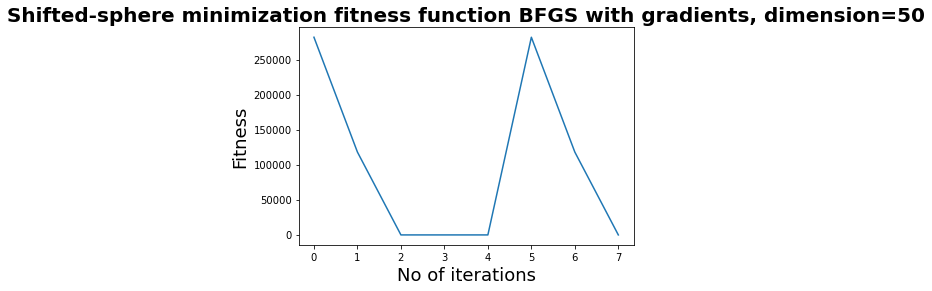

In [32]:
# Plot value of the fitness function 
plt.title("Shifted-sphere minimization fitness function BFGS with gradients, dimension=50",fontsize=20,fontweight='bold')
plt.xlabel("No of iterations",fontsize=18)
plt.ylabel("Fitness",fontsize=18)

plt.plot(history[:MAX_ITER])

Let's now optimize the sphere function at dimension 500 using again the BFGS algorithm

In [33]:
#Define dimension, shift and initial solution proposal
d500 = 500
shift  = np.random.uniform(-100,100,d500)
x_0_500 = np.random.uniform(-100,100,d500)

In [34]:
minimize_function_jac(d500, shifted_sphere,-100,100,x_0_500,optimizer = 'BFGS')

Optimization terminated successfully.
         Current function value: -450.000000
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 8


      fun: -450.0
 hess_inv: array([[ 9.99993412e-01, -1.46646025e-04,  1.11785727e-05, ...,
         5.44070389e-05,  1.89335616e-05, -6.75417509e-06],
       [-1.46646025e-04,  9.96735923e-01,  2.48814957e-04, ...,
         1.21100300e-03,  4.21427086e-04, -1.50335810e-04],
       [ 1.11785727e-05,  2.48814957e-04,  9.99981033e-01, ...,
        -9.23126625e-05, -3.21246573e-05,  1.14598386e-05],
       ...,
       [ 5.44070389e-05,  1.21100300e-03, -9.23126625e-05, ...,
         9.99550707e-01, -1.56353367e-04,  5.57759835e-05],
       [ 1.89335616e-05,  4.21427086e-04, -3.21246573e-05, ...,
        -1.56353367e-04,  9.99945589e-01,  1.94099521e-05],
       [-6.75417509e-06, -1.50335810e-04,  1.14598386e-05, ...,
         5.57759835e-05,  1.94099521e-05,  9.99993076e-01]])
      jac: array([-1.42108547e-14, -1.42108547e-13, -2.13162821e-14,  3.69482223e-13,
        1.70530257e-13,  1.13686838e-13, -3.41060513e-13,  1.42108547e-13,
       -1.42108547e-14, -2.84217094e-14,  0.00000000e

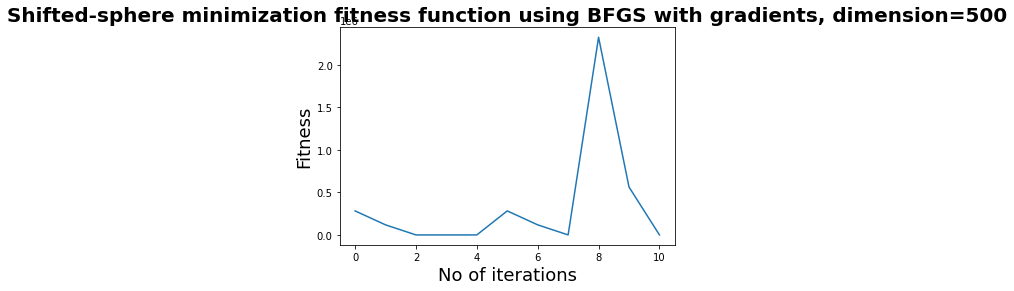

In [35]:
# Plot value of the fitness function 
plt.title("Shifted-sphere minimization fitness function using BFGS with gradients, dimension=500",fontsize=20,fontweight='bold')
plt.xlabel("No of iterations",fontsize=18)
plt.ylabel("Fitness",fontsize=18)

plt.plot(history[:MAX_ITER])

We notice that when using the BFGS algorithm with the gradients the minimum is reached at only 3 iterations and 7 function evaluations !

The stopping criterion is the tol (set in our case at 1e-5) meaning the gradient norm must be less than this threshold (tol=gtol for the 'BFGS' algorithm) before successful termination.

We also used the PSO algorithm which works quite well but was more difficult to fine-tune because of it's greater number of parameters. And also it did not converge as quickly as the BFGS algorithm so finally we chose the later one.